# Laboratory 02: Statistical analysis 

In [3]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt


## Information  

|Variable | Type | Description | 
|---|---|---|
|Gender	Feature| 	Categorical|	
|Age	Feature|	Continuous|
|Height	 Feature|	Continuous|	
|Weight	 Feature|	Continuous|		
|family_history_with_overweight	Feature|	Binary|	   Has a family member suffered or suffers from overweight?|
|FAVC Feature	|Binary|		Do you eat high caloric food frequently?|
|FCVC	Feature |	Integer |		Do you usually eat vegetables in your meals?|
|NCP	Feature|	Continuous|		How many main meals do you have daily?|
|CAEC	Feature	|Categorical|		Do you eat any food between meals?|
|SMOKE	Feature |	Binary |		Do you smoke?|	
|CH2O	Feature |	Continuous|		How much water do you drink daily?|
|SCC	Feature	| Binary |		Do you monitor the calories you eat daily?|
|FAF	Feature	| Continuous	|	How often do you have physical activity? |
|TUE	Feature |	Integer		| How much time do you use technological devices such as cell phone, videogames, television, computer and others? |	
|CALC	Feature |	Categorical	|	How often do you drink alcohol?	|
|MTRANS	Feature	| Categorical |		Which transportation do you usually use? |
|NObeyesdad	Target |	Categorical	|	Obesity level |	

## Dataset

In [82]:
column_names = ['Gender', 'Age', 'Height', 'Weight', 
            'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad']


In [115]:
dataset = pd.read_csv("estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition/data.csv", sep = ",", skipinitialspace=True)
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [116]:
print("|Count of row| = ", dataset.shape[0])
print("|Features| = ", dataset.shape[1])

|Count of row| =  2111
|Features| =  17


Missing values not have in this dataset

## Descriptive Statistical Analysis

### Numerical variables

In [118]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

**Histogram with Frequencies**

In [121]:
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "red", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)    
    plt.show()

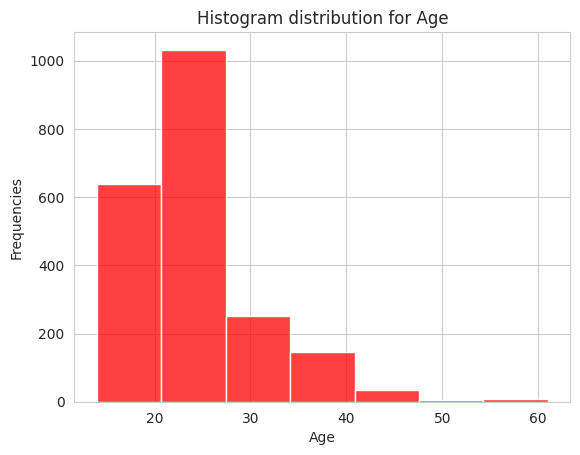

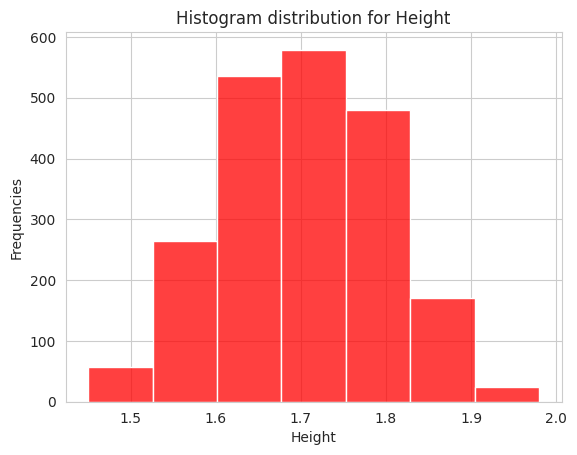

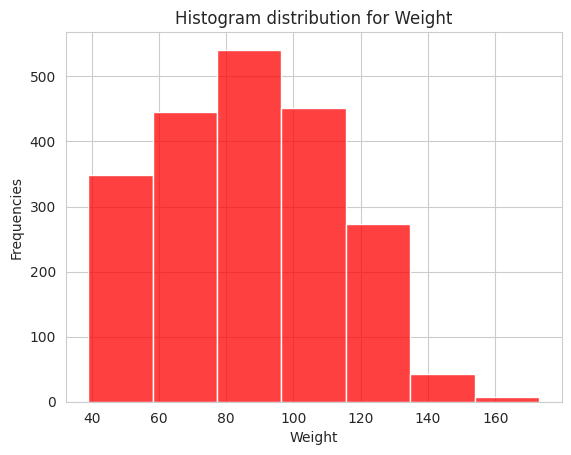

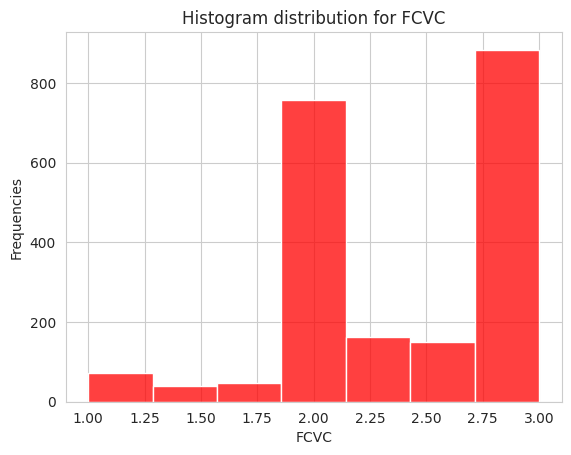

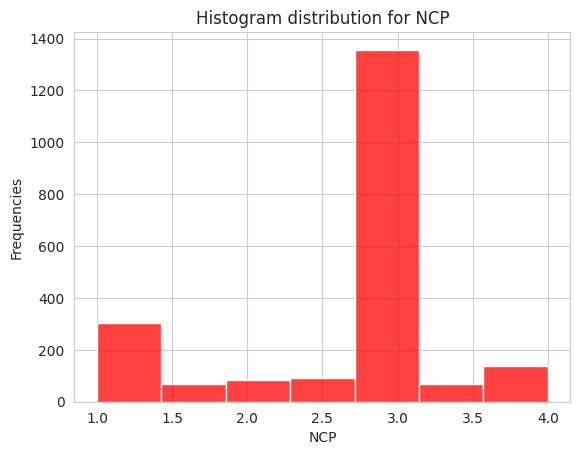

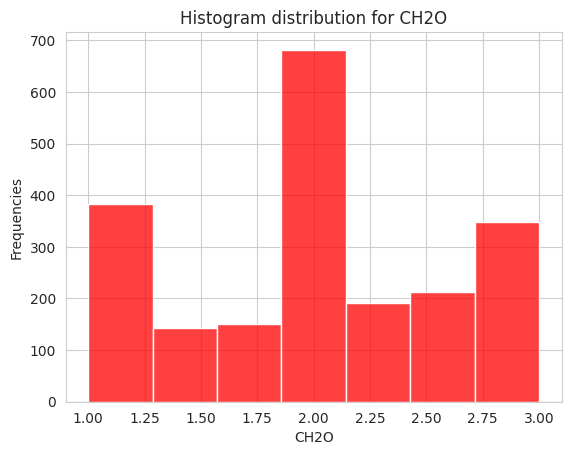

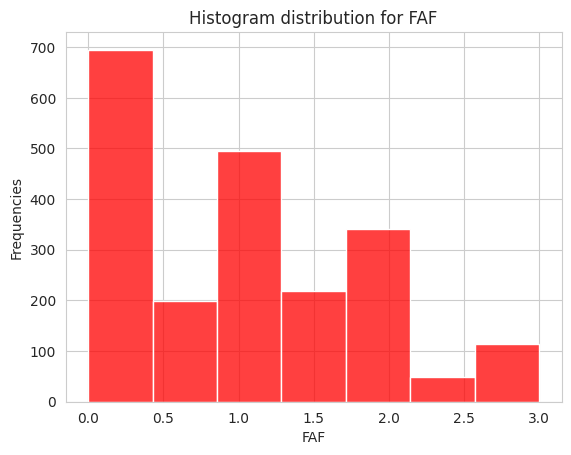

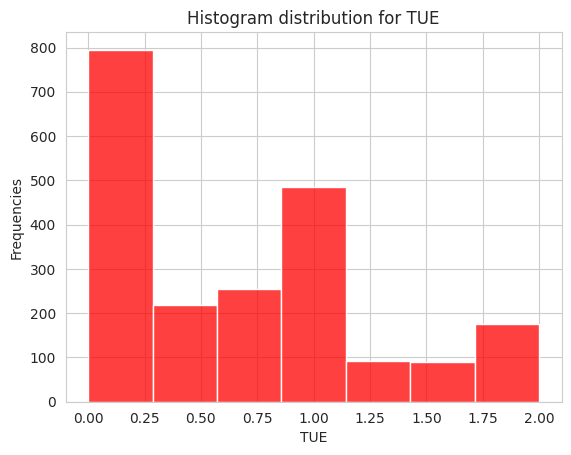

In [124]:
for col in numerical_cols:
    hist_frequencies(dataset, col, 7)

**Histogram with Densities and KDE line (kernel density estimate)**

In [126]:
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "red", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "blue", linewidth = 1.5)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)    
    plt.show()

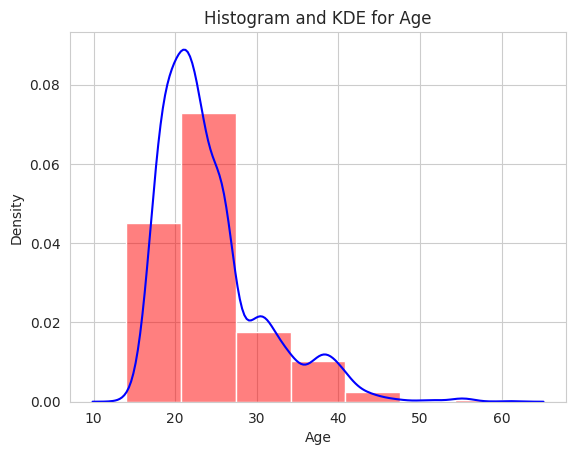

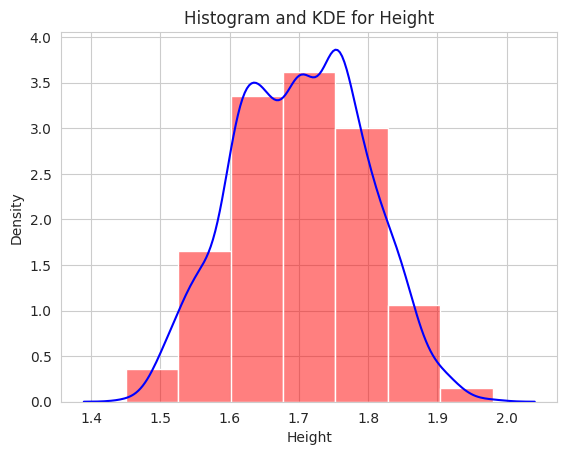

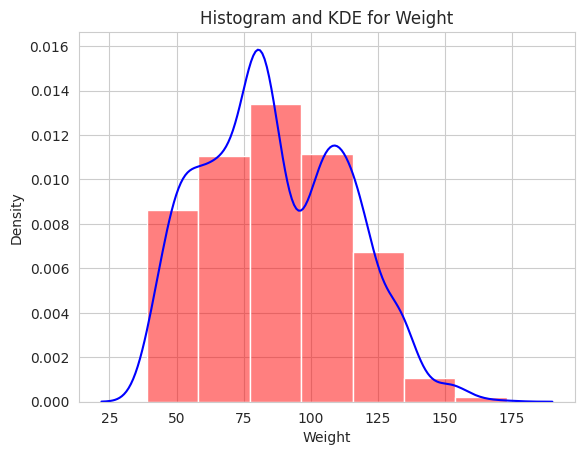

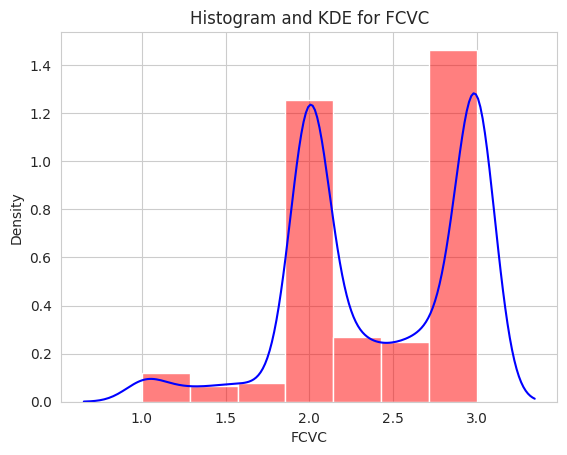

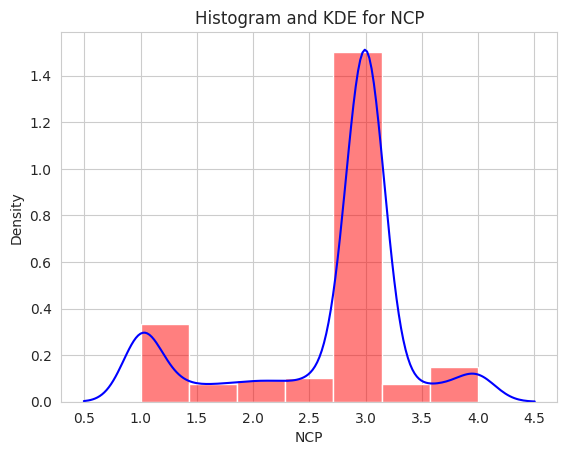

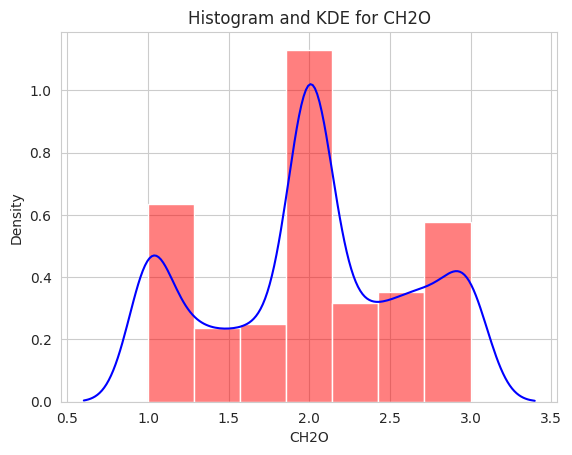

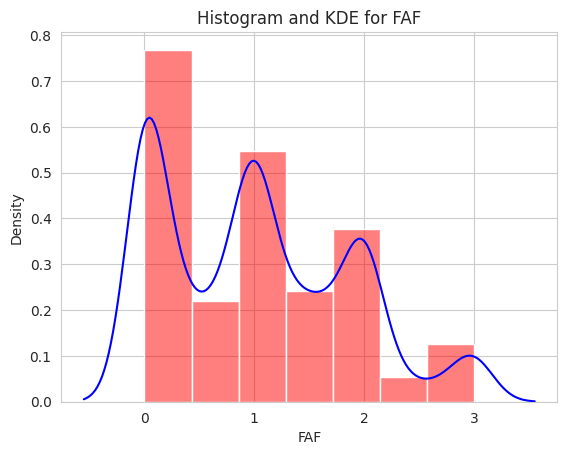

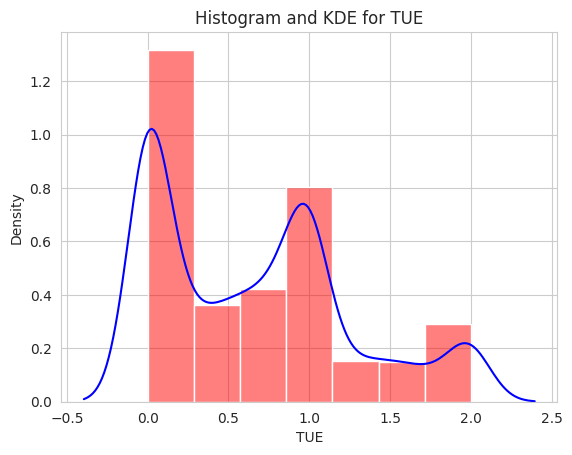

In [128]:
for col in numerical_cols:
    hist_density(dataset, col, 7)

**Box Plot**

In [129]:
def statistics_nvar(data, numerical_cols):
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

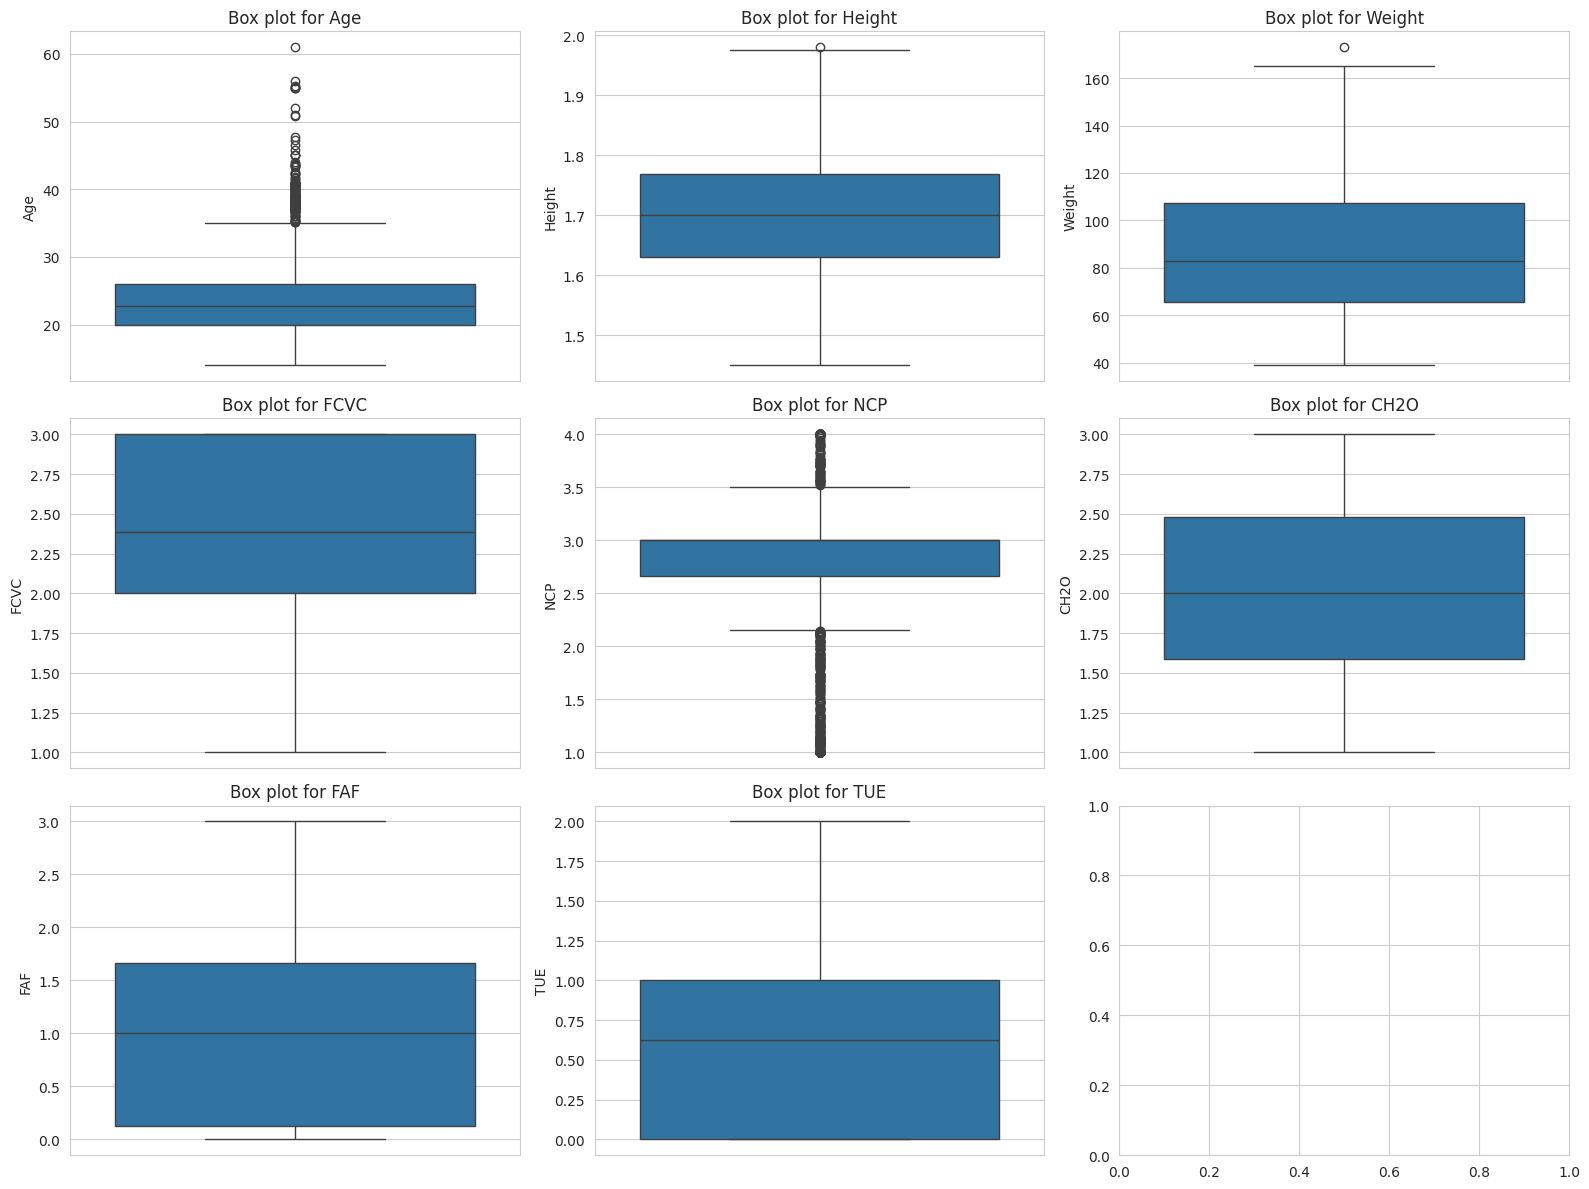

In [131]:
statistics_nvar(dataset, numerical_cols)

**Statistical metrics**

In [132]:
dataset[numerical_cols].describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Correlation Analysis**

In [95]:
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()    
    plt.show()

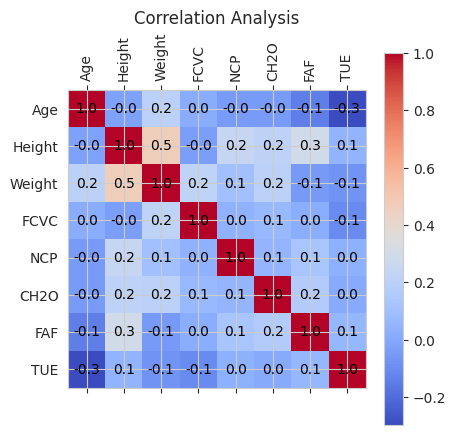

In [133]:
plot_correlation(dataset, numerical_cols)

**Outliers detection using Z-Score**  

In [139]:
from scipy.stats import norm

def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile

call_percentile(z = -2)

2.275

In [140]:
from scipy import stats

def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    return outliers

In [141]:
outliers_detection(dataset, "Age").head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
13,Male,41.0,1.80,99.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Automobile,Obesity_Type_I
21,Female,52.0,1.69,87.0,yes,yes,3.0,1.0,Sometimes,yes,2.0,no,0.0,0.0,no,Automobile,Obesity_Type_I
92,Male,55.0,1.78,84.0,yes,no,3.0,4.0,Frequently,no,3.0,yes,3.0,0.0,Frequently,Walking,Overweight_Level_I
116,Female,15.0,1.65,86.0,yes,yes,3.0,3.0,Sometimes,no,1.0,no,3.0,2.0,no,Walking,Obesity_Type_I
133,Female,61.0,1.65,66.0,no,yes,3.0,3.0,Always,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight


In [142]:
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Age ***
#samples outlier to distribution = 80
%outliers = 3.79 %

*** Outliers detection in Height ***
#samples outlier to distribution = 98
%outliers = 4.64 %

*** Outliers detection in Weight ***
#samples outlier to distribution = 98
%outliers = 4.64 %

*** Outliers detection in FCVC ***
#samples outlier to distribution = 49
%outliers = 2.32 %

*** Outliers detection in NCP ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in CH2O ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in FAF ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in TUE ***
#samples outlier to distribution = 0
%outliers = 0.0 %


### Categorical Variables

In [143]:
categorical_vars = list(set(dataset.columns) - set(numerical_cols))
categorical_vars

['family_history_with_overweight',
 'MTRANS',
 'Gender',
 'FAVC',
 'CALC',
 'SCC',
 'SMOKE',
 'NObeyesdad',
 'CAEC']

Count instances for each categorical column

In [145]:
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** family_history_with_overweight ******
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

***** MTRANS ******
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

***** Gender ******
Gender
Male      1068
Female    1043
Name: count, dtype: int64

***** FAVC ******
FAVC
yes    1866
no      245
Name: count, dtype: int64

***** CALC ******
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

***** SCC ******
SCC
no     2015
yes      96
Name: count, dtype: int64

***** SMOKE ******
SMOKE
no     2067
yes      44
Name: count, dtype: int64

***** NObeyesdad ******
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, 

**Bar chart (absolute)**

In [148]:
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y", color='red')
    plt.title("Statistical analysis by " + col)
    plt.show()

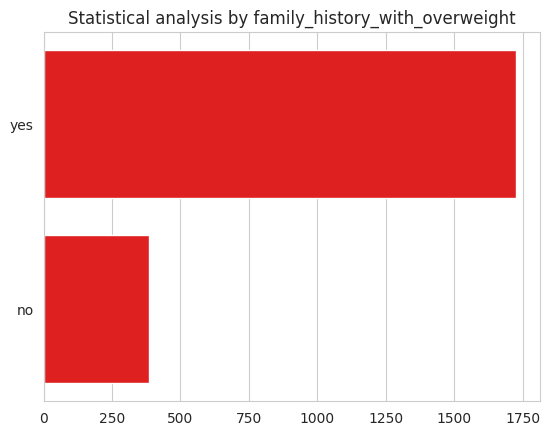

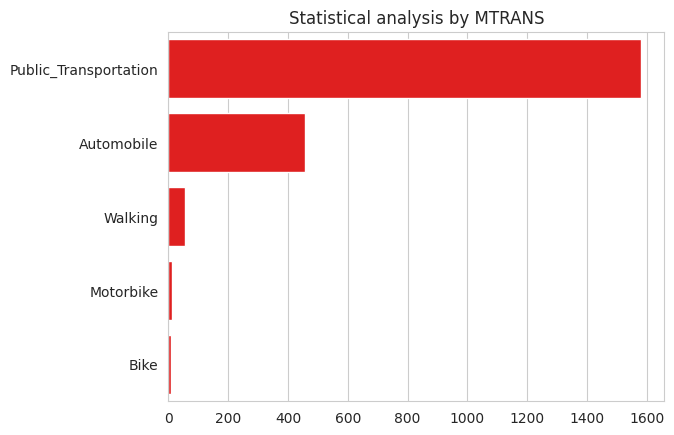

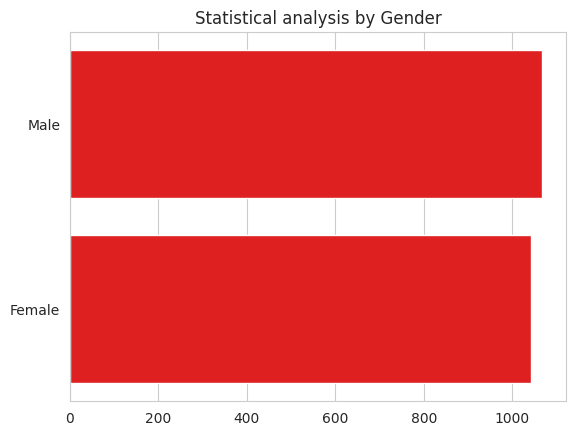

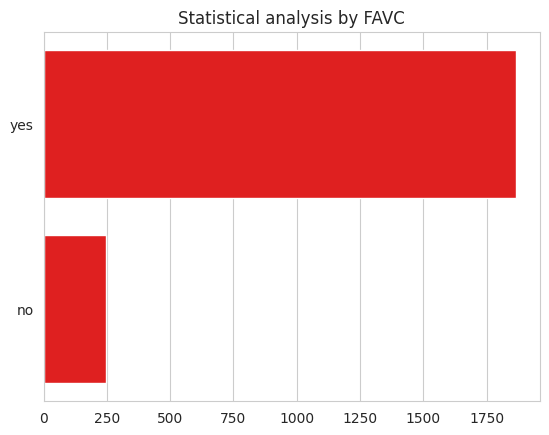

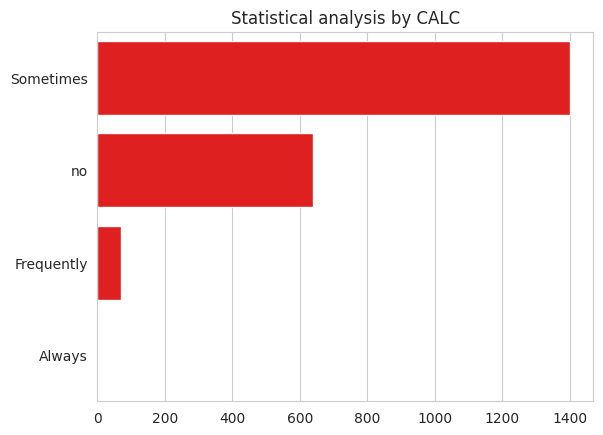

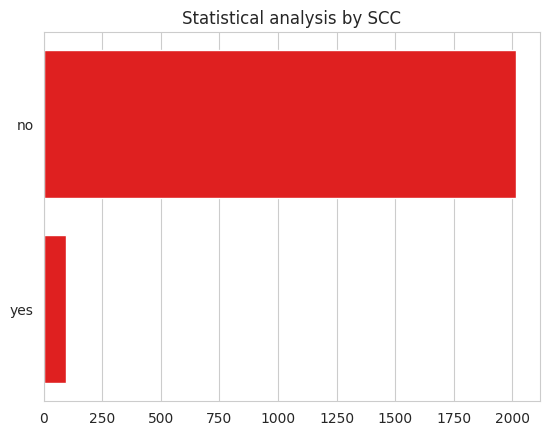

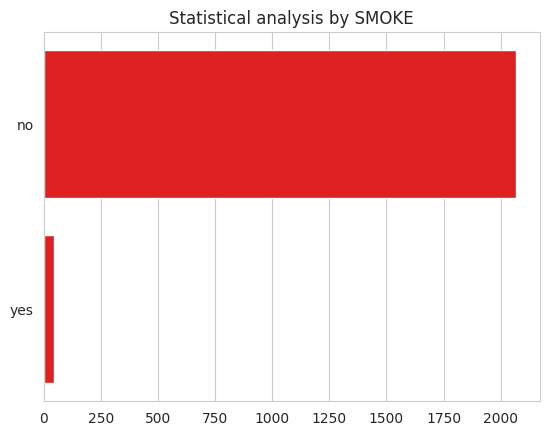

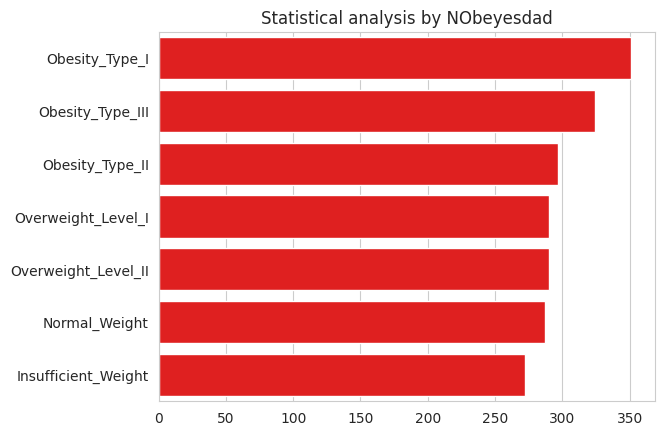

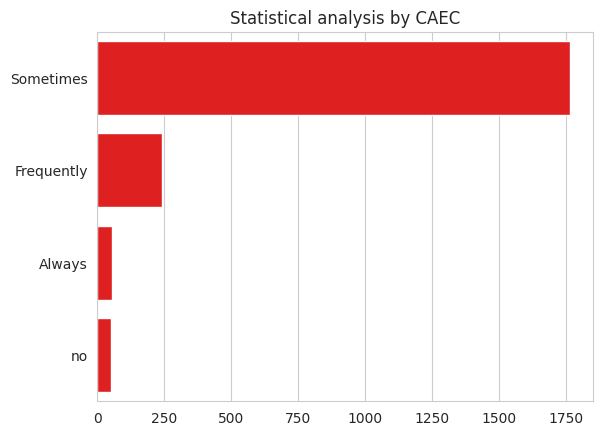

In [149]:
for col in categorical_vars:
    plot_barchart(dataset, col)

**Pie Chart (relative)**

In [151]:
def plot_piechart(dataset, col):
    results = dataset[col].value_counts()
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

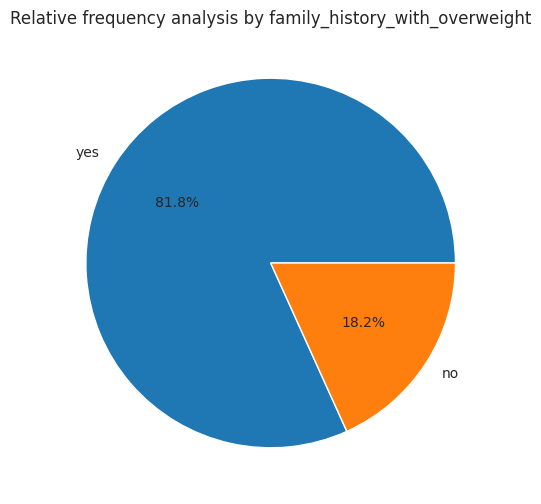

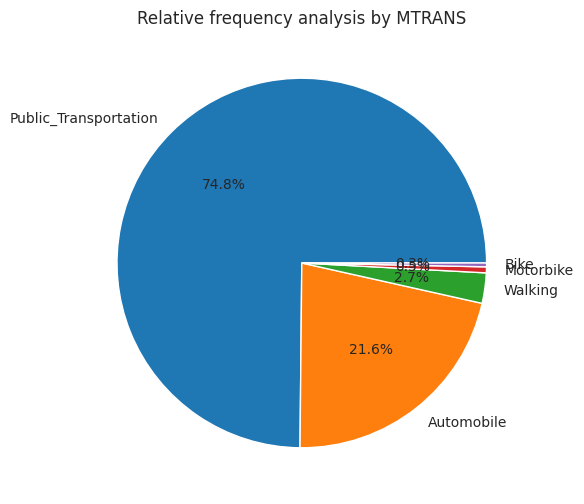

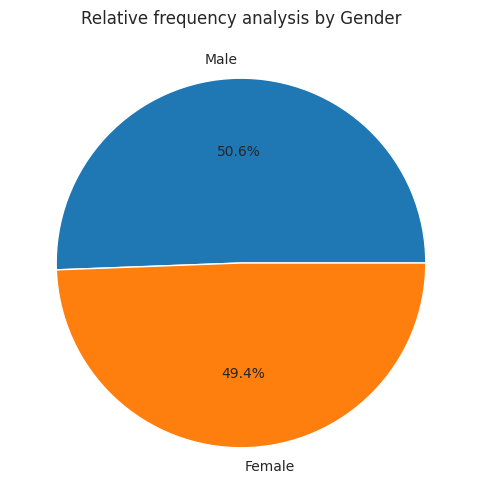

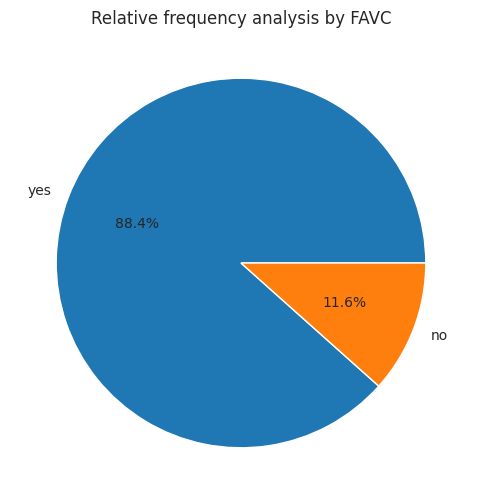

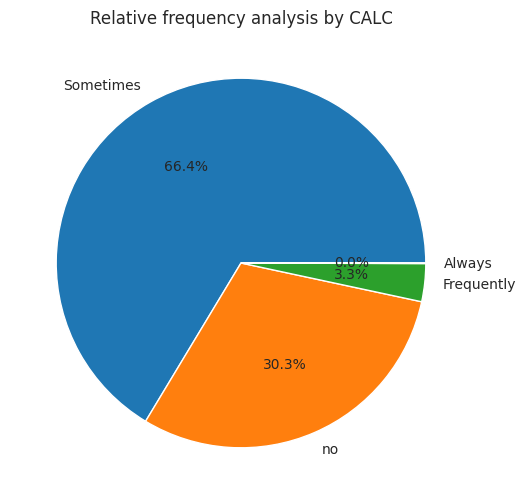

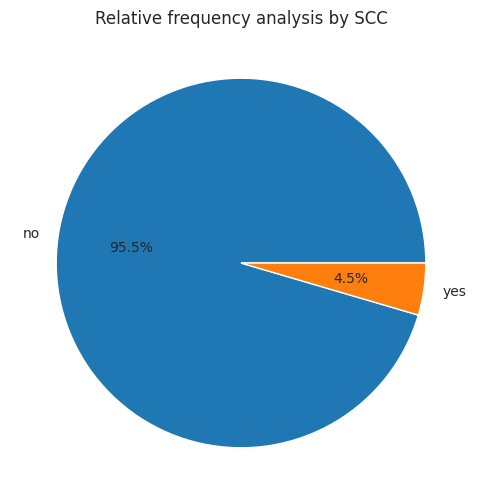

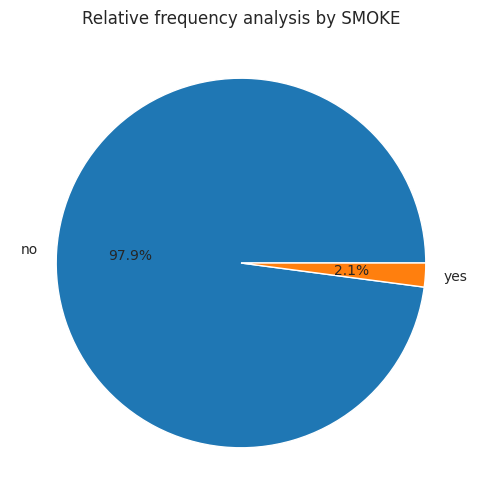

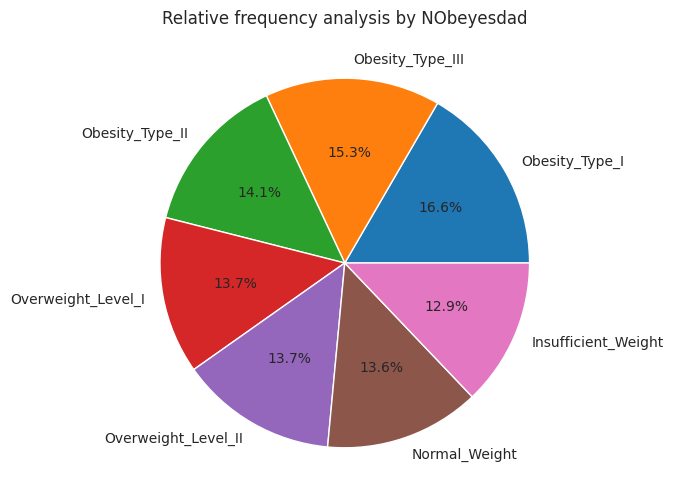

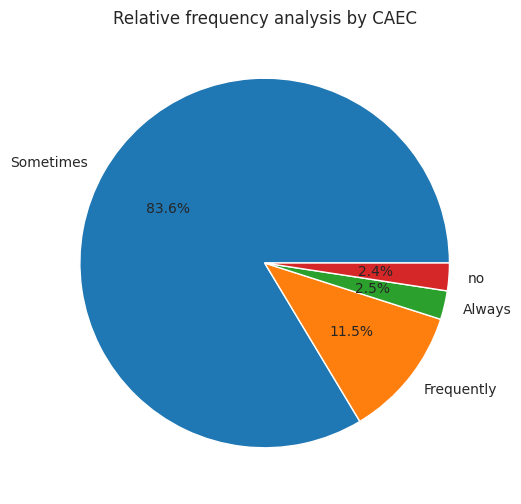

In [152]:
for col in categorical_vars:
    plot_piechart(dataset, col)

**Statistical Analysis (subgroups)**

In [154]:
group_sex_income = dataset.groupby(["Gender", "family_history_with_overweight"]).size().reset_index(name = "count")
print(group_sex_income)

   Gender family_history_with_overweight  count
0  Female                             no    232
1  Female                            yes    811
2    Male                             no    153
3    Male                            yes    915


In [156]:
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "count", hue = g2, palette = "pastel")
    plt.xlabel('Gender')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Gender and family_history_with_overweight')
    plt.tight_layout()
    plt.show()

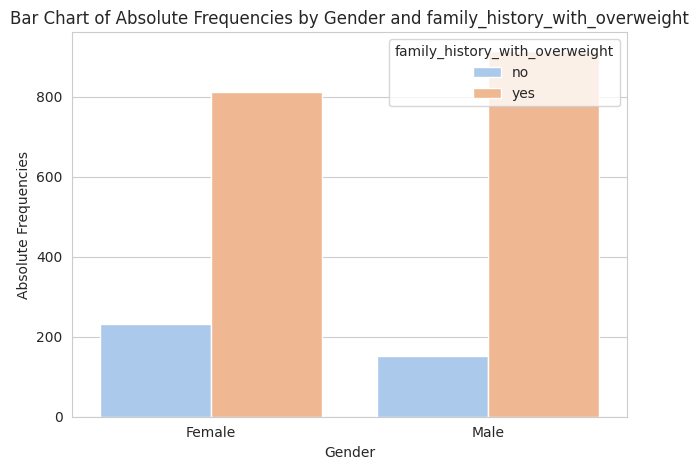

In [112]:
plot_absfreq_groups(group_sex_income, "Gender", "family_history_with_overweight")

In [160]:
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with family_history_with_overweight " + group[g2]
    sizes = group["count"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Gender and family_history_with_overweight')
    plt.show()

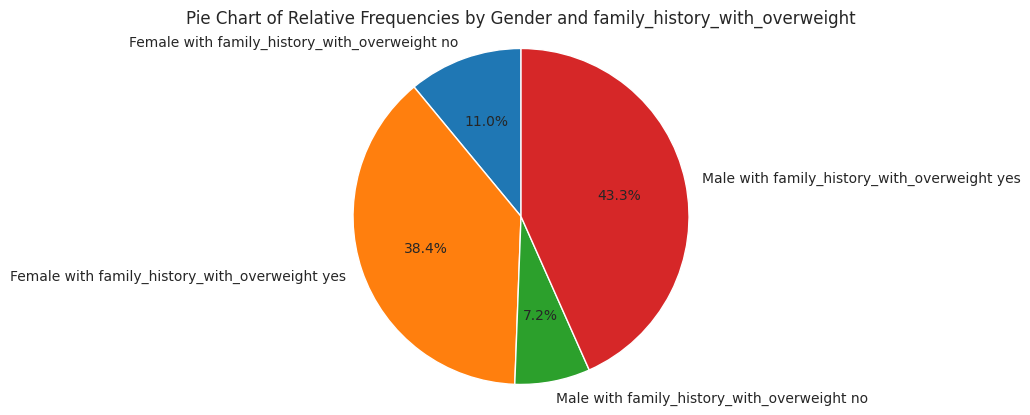

In [161]:
plot_relfreq_groups(group_sex_income, "Gender", "family_history_with_overweight")